## 00. PyTorch Fundamentals

Resource: https://www.learnpytorch.io/00_pytorch_fundamentals/

In [53]:
import torch
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.2


### Tensors

#### Creating tensors

Tensors are pretty much multidimensional vectors

https://pytorch.org/docs/stable/tensors.html

### Naming conventions
(usually/example)
| Name | Dims | Convention |
|:----:|:----:|:----------:|
|scalar|   0  |     a      |
|vector|   1  |     y      |
|matrix|   2  |     Q      |
|tensor|  >2  |     X      |


In [2]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
# Scalar - single number, so no dimensions (like a point)
scalar.ndim

0

In [4]:
# Get tensor back as Python int
scalar.item()

7

In [5]:
# vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [8]:
# one dimension obviously, shape is [2]
print(vector.ndim, vector.shape)

1 ,  torch.Size([2])


In [9]:
# matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [11]:
# two dimensions, shape is [2, 2]
print(MATRIX.ndim, MATRIX.shape)

2 torch.Size([2, 2])


In [13]:
# tensor
# I only entered the 3rd dimension and formatting this is already hell
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6]],
                       [[7, 8, 9],
                        [10, 11, 12]]])
TENSOR

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

In [14]:
TENSOR.shape

torch.Size([2, 2, 3])

In [18]:
# This won't work, the dimensions must be equal 
try:
    tensorTest = torch.tensor([[1,2], [3]])
except Exception as e:
    print(e)

expected sequence of length 2 at dim 1 (got 1)


### Random tensors

Neural networks start with randomly generated tensors and then adjust the numbers to better represent the data.

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [24]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.2625, 0.7223, 0.3535, 0.8586],
        [0.7763, 0.8737, 0.0435, 0.2444],
        [0.3342, 0.4744, 0.2331, 0.0406]])

In [36]:
# Create a random tensor with a similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, color channels (R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

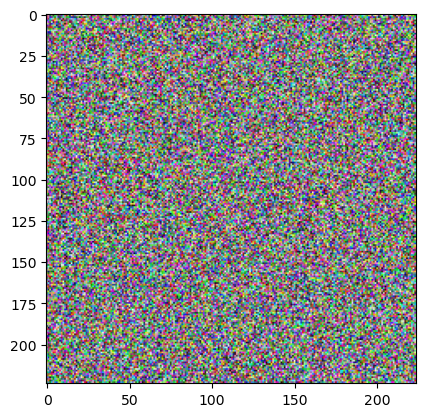

In [37]:
plt.imshow(random_image_size_tensor)

In [40]:
### Zeros and ones
zeros = torch.zeros(3, 3)
ones = torch.ones(3, 3)
zeros, ones

(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

In [41]:
ones.dtype

torch.float32

### Creating a range of tensors and tensors-like

`torch.range(x, y)` - deprecated, creates numbers in range from x to y

`torch.arange(x, y)` - creates numbers in range from x to (y-1) - more python-like

https://pytorch.org/docs/stable/generated/torch.arange.html

In [48]:
# Use torch.arange()
range_tensor = torch.arange(start=0, end=21, step=2)

In [52]:
# Creating tensors like
# Takes the shape of the tensor you pass it and creates a zero tensor (or one tensor for ones_like())
ten_zeros = torch.zeros_like(input=range_tensor)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note: ** Tensor datatypes are one of the 3 most common problems you'll run into with PyTorch & deep learning:
1. Wrong datatype
2. Wrong shape
3. Tensors on wrong device

In [60]:
# float32 tensor aka the default one
float_32_tensor = torch.tensor([3., 6., 9.],
                               dtype=None, # data type obviously
                               device=None, # what device is the tensor on (CPU/GPU)
                               requires_grad=False) # whether or not to track gradients with this tensors operations
float_32_tensor.dtype

torch.float32

In [61]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [64]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [65]:
int_32_tensor = torch.tensor([3, 6, 9],
                             dtype=torch.int32)

In [66]:
int_32_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [67]:
long_tensor = torch.tensor([3, 6, 9],
                            dtype=torch.long)

In [70]:
long_tensor * float_32_tensor # dtype = float32

tensor([ 9., 36., 81.])

##### Apparently it can multiply whatever

### Getting information from tensors

1. Wrong datatype - get datatype from a tensor `tensor.dtype`
2. Wrong shape - get shape from a tensor `tensor.shape`
3. Wrong device - get device from a tensor `tensor.device`

In [71]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is stored on: {some_tensor.device}")

tensor([[0.2735, 0.2756, 0.9273, 0.4222],
        [0.2172, 0.6434, 0.2964, 0.4782],
        [0.1511, 0.0723, 0.8361, 0.4085]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is stored on: cpu


### Manipulating tensors (tensor operations)

Tensor operations include:
* addition
* subtraction
* multiplication (element-wise)
* division
* matrix multiplication

In [76]:
# Create a tensor
tensor = torch.tensor([1, 2, 3])

# addition
print(tensor + 10)

# multiply
print(tensor * 10)

# subtraction
print(tensor - 10)

# division
print(tensor / 10)

# element-wise multiplication
print(tensor * tensor)

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([-9, -8, -7])
tensor([0.1000, 0.2000, 0.3000])
tensor([1, 4, 9])


In [77]:
# PyTorch in-built functions

# addition
print(torch.add(tensor, 10))

# multiply
print(torch.mul(tensor, 10))

# subtraction
print(torch.sub(tensor, 10))

# division
print(torch.div(tensor, 10))

# element-wise multiplication
print(torch.mul(tensor, tensor))

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([-9, -8, -7])
tensor([0.1000, 0.2000, 0.3000])
tensor([1, 4, 9])


### Matrix multiplication

In [81]:
# Matrix multi
print(torch.matmul(tensor, tensor.T))

tensor(14)
